# DNA & RNA Simulated Load Balancing Plots

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
sns.set_context('talk')
sns.set_style('ticks')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#cores
cores = [1, 2, 4, 8, 16, 20, 32, 64, 128, 256]

# DNA 1 & 2

In [3]:
#read in data
d1 = pd.read_csv('../load_balancing_simulator/output/DNA1.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#read in data
d2 = pd.read_csv('../load_balancing_simulator/output/DNA2.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#sort by 'case'
d1 = d1.sort_values(by=['case'])
d2 = d2.sort_values(by=['case'])

In [4]:
#separate cases (10 rows per case)
#DNA1
d1_descending = d1.iloc[0:10].sort_values(by=['cores'])
d1_original = d1.iloc[10:20].sort_values(by=['cores'])
d1_random = d1.iloc[20:30].sort_values(by=['cores'])
d1_ascending = d1.iloc[30:40].sort_values(by=['cores'])

#DNA2
d2_descending = d2.iloc[0:10].sort_values(by=['cores'])
d2_original = d2.iloc[10:20].sort_values(by=['cores'])
d2_random = d2.iloc[20:30].sort_values(by=['cores'])
d2_ascending = d2.iloc[30:40].sort_values(by=['cores'])

#calculate speedups
#DNA1
d1_descending_speedup = [d1_descending.iloc[0]['total_time']/p for p in d1_descending['total_time']]
d1_original_speedup = [d1_original.iloc[0]['total_time']/p for p in d1_original['total_time']]
d1_random_speedup = [d1_random.iloc[0]['total_time']/p for p in d1_random['total_time']]
d1_ascending_speedup = [d1_ascending.iloc[0]['total_time']/p for p in d1_ascending['total_time']]

#DNA2
d2_descending_speedup = [d2_descending.iloc[0]['total_time']/p for p in d2_descending['total_time']]
d2_original_speedup = [d2_original.iloc[0]['total_time']/p for p in d2_original['total_time']]
d2_random_speedup = [d2_random.iloc[0]['total_time']/p for p in d2_random['total_time']]
d2_ascending_speedup = [d2_ascending.iloc[0]['total_time']/p for p in d2_ascending['total_time']]

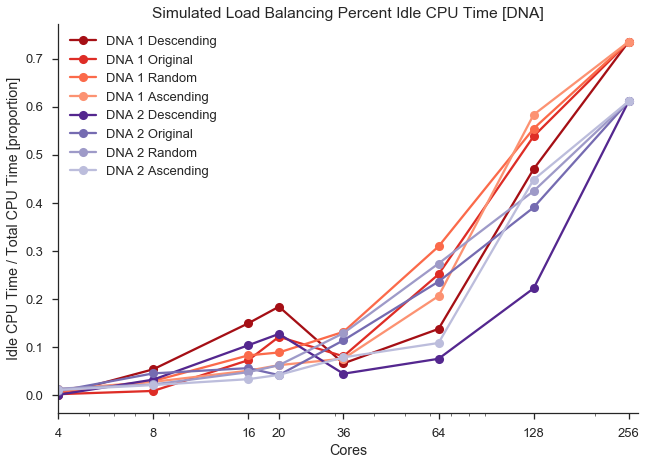

In [5]:
#plot %wasted vs. cores for simulated sorting
#DNA1
plt.plot(cores, d1_descending['%_wasted'], '-o', c ='#a50f15', label='DNA 1 Descending')
plt.plot(cores, d1_original['%_wasted'], '-o', c ='#de2d26', label='DNA 1 Original')
plt.plot(cores, d1_random['%_wasted'], '-o', c ='#fb6a4a', label='DNA 1 Random')
plt.plot(cores, d1_ascending['%_wasted'], '-o', c ='#fc9272', label='DNA 1 Ascending')

#DNA2
plt.plot(cores, d2_descending['%_wasted'], '-o', c ='#54278f', label='DNA 2 Descending')
plt.plot(cores, d2_original['%_wasted'], '-o', c ='#756bb1', label='DNA 2 Original')
plt.plot(cores, d2_random['%_wasted'], '-o', c ='#9e9ac8', label='DNA 2 Random')
plt.plot(cores, d2_ascending['%_wasted'], '-o', c ='#bcbddc', label='DNA 2 Ascending')

#labels & axes
plt.title('Simulated Load Balancing Percent Idle CPU Time [DNA]')
plt.xlabel('Cores')
plt.ylabel('Idle CPU Time / Total CPU Time [proportion]')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.xlim([4, 275])
sns.despine();

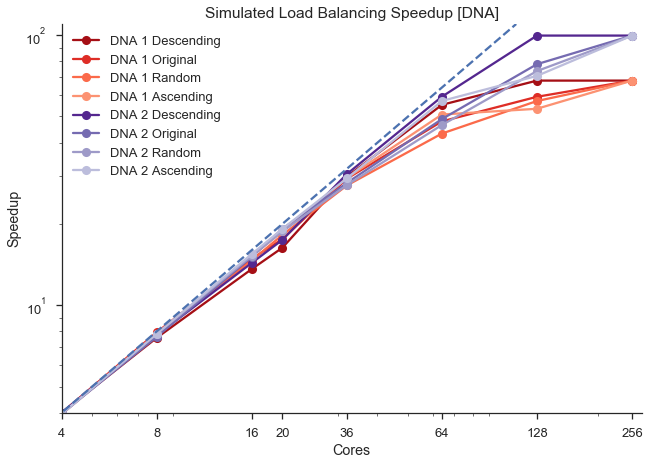

In [6]:
#plot speedup vs. cores for simulated sorting
#DNA1
plt.plot(cores, d1_descending_speedup, '-o', c ='#a50f15', label='DNA 1 Descending')
plt.plot(cores, d1_original_speedup, '-o', c ='#de2d26', label='DNA 1 Original')
plt.plot(cores, d1_random_speedup, '-o', c ='#fb6a4a', label='DNA 1 Random')
plt.plot(cores, d1_ascending_speedup, '-o', c ='#fc9272', label='DNA 1 Ascending')

#DNA2
plt.plot(cores, d2_descending_speedup, '-o', c ='#54278f', label='DNA 2 Descending')
plt.plot(cores, d2_original_speedup, '-o', c ='#756bb1', label='DNA 2 Original')
plt.plot(cores, d2_random_speedup, '-o', c ='#9e9ac8', label='DNA 2 Random')
plt.plot(cores, d2_ascending_speedup, '-o', c ='#bcbddc', label='DNA 2 Ascending')

# add diagonal line
x = [0, 110]
y = [0, 110]
plt.plot(x, y, '--')

#labels & axes
plt.title('Simulated Load Balancing Speedup [DNA]')
plt.xlabel('Cores')
plt.ylabel('Speedup')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.yscale('log')
plt.xlim([4,275])
plt.ylim([4,110])
sns.despine();

# RNA 1 & 2

In [7]:
#read in data
r1 = pd.read_csv('../load_balancing_simulator/output/RNA1.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])
r2 = pd.read_csv('../load_balancing_simulator/output/RNA2.simulate.txt', sep='\t', header=None,
                names=['case', 'cores', 'idle_time', 'compute_time', 'total_time', '%_wasted'])

#sort by 'case'
r1 = r1.sort_values(by=['case'])
r2 = r2.sort_values(by=['case'])

In [8]:
#separate cases (10 rows per case)
#RNA1
r1_descending = r1.iloc[0:10].sort_values(by=['cores'])
r1_original = r1.iloc[10:20].sort_values(by=['cores'])
r1_random = r1.iloc[20:30].sort_values(by=['cores'])
r1_ascending = r1.iloc[30:40].sort_values(by=['cores'])

#RNA2
r2_descending = r2.iloc[0:10].sort_values(by=['cores'])
r2_original = r2.iloc[10:20].sort_values(by=['cores'])
r2_random = r2.iloc[20:30].sort_values(by=['cores'])
r2_ascending = r2.iloc[30:40].sort_values(by=['cores'])

#speedup
#RNA1
r1_descending_speedup = [r1_descending.iloc[0]['total_time']/p for p in r1_descending['total_time']]
r1_original_speedup = [r1_original.iloc[0]['total_time']/p for p in r1_original['total_time']]
r1_random_speedup = [r1_random.iloc[0]['total_time']/p for p in r1_random['total_time']]
r1_ascending_speedup = [r1_ascending.iloc[0]['total_time']/p for p in r1_ascending['total_time']]

#RNA2
r2_descending_speedup = [r2_descending.iloc[0]['total_time']/p for p in r2_descending['total_time']]
r2_original_speedup = [r2_original.iloc[0]['total_time']/p for p in r2_original['total_time']]
r2_random_speedup = [r2_random.iloc[0]['total_time']/p for p in r2_random['total_time']]
r2_ascending_speedup = [r2_ascending.iloc[0]['total_time']/p for p in r2_ascending['total_time']]

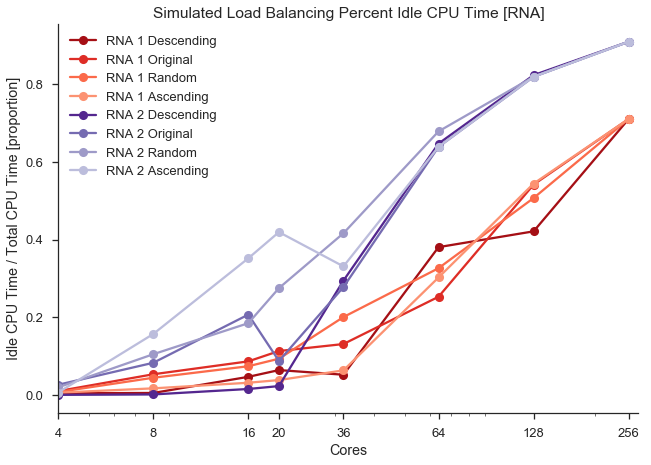

In [9]:
#plot %wasted vs. cores for simulated sorting
#RNA1
plt.plot(cores, r1_descending['%_wasted'], '-o', c ='#a50f15', label='RNA 1 Descending')
plt.plot(cores, r1_original['%_wasted'], '-o', c ='#de2d26', label='RNA 1 Original')
plt.plot(cores, r1_random['%_wasted'], '-o', c ='#fb6a4a', label='RNA 1 Random')
plt.plot(cores, r1_ascending['%_wasted'], '-o', c ='#fc9272', label='RNA 1 Ascending')

#DNA2
plt.plot(cores, r2_descending['%_wasted'], '-o', c ='#54278f', label='RNA 2 Descending')
plt.plot(cores, r2_original['%_wasted'], '-o', c ='#756bb1', label='RNA 2 Original')
plt.plot(cores, r2_random['%_wasted'], '-o', c ='#9e9ac8', label='RNA 2 Random')
plt.plot(cores, r2_ascending['%_wasted'], '-o', c ='#bcbddc', label='RNA 2 Ascending')

#labels & axes
plt.title('Simulated Load Balancing Percent Idle CPU Time [RNA]')
plt.xlabel('Cores')
plt.ylabel('Idle CPU Time / Total CPU Time [proportion]')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.xlim([4, 275])
sns.despine();

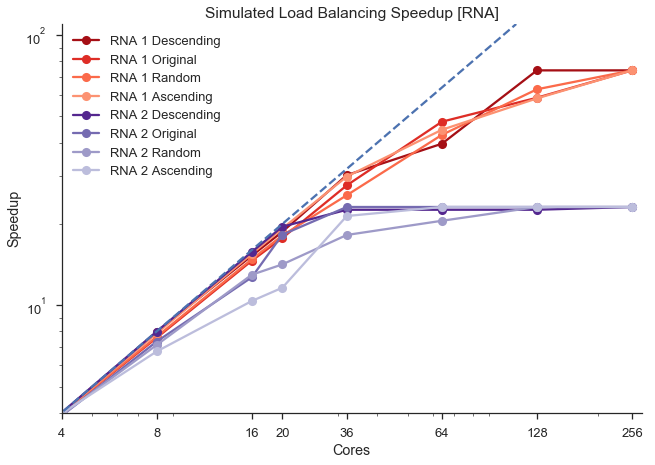

In [10]:
#plot speedup vs. cores for simulated sorting
#RNA1
plt.plot(cores, r1_descending_speedup, '-o', c ='#a50f15', label='RNA 1 Descending')
plt.plot(cores, r1_original_speedup, '-o', c ='#de2d26', label='RNA 1 Original')
plt.plot(cores, r1_random_speedup, '-o', c ='#fb6a4a', label='RNA 1 Random')
plt.plot(cores, r1_ascending_speedup, '-o', c ='#fc9272', label='RNA 1 Ascending')

#RNA2
plt.plot(cores, r2_descending_speedup, '-o', c ='#54278f', label='RNA 2 Descending')
plt.plot(cores, r2_original_speedup, '-o', c ='#756bb1', label='RNA 2 Original')
plt.plot(cores, r2_random_speedup, '-o', c ='#9e9ac8', label='RNA 2 Random')
plt.plot(cores, r2_ascending_speedup, '-o', c ='#bcbddc', label='RNA 2 Ascending')

# add diagonal line
x = [0, 110]
y = [0, 110]
plt.plot(x, y, '--')

#labels & axes
plt.title('Simulated Load Balancing Speedup [RNA]')
plt.xlabel('Cores')
plt.ylabel('Speedup')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.xticks([1, 2, 4, 8, 16, 20, 32, 64, 128, 256], ('1','2','4','8','16','20','36','64','128','256'))
plt.yscale('log')
plt.xlim([4,275])
plt.ylim([4,110])
sns.despine();

In [11]:
#speedup tables
pd.DataFrame({'Cores':cores, 
              'DNA 1 Ascending Speedup': d1_ascending_speedup, 
              'DNA 1 Original Speedup':d1_original_speedup, 
              'DNA 1 Random Speedup':d1_random_speedup, 
              'DNA 1 Descending Speedup':d1_descending_speedup,
              'DNA 2 Ascending Speedup': d2_ascending_speedup, 
              'DNA 2 Original Speedup':d2_original_speedup, 
              'DNA 2 Random Speedup':d2_random_speedup, 
              'DNA 2 Descending Speedup':d2_descending_speedup})

,Cores,DNA 1 Ascending Speedup,DNA 1 Descending Speedup,DNA 1 Original Speedup,DNA 1 Random Speedup,DNA 2 Ascending Speedup,DNA 2 Descending Speedup,DNA 2 Original Speedup,DNA 2 Random Speedup
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.991802,1.999221,1.994395,1.996812,1.990307,1.999984,1.999258,1.996119
2,4,3.952034,3.998611,3.993065,3.976517,3.957735,3.998327,3.967029,3.946639
3,8,7.781063,7.572055,7.932448,7.765163,7.834220,7.743720,7.640053,7.824704
4,16,15.192548,13.612122,14.841275,14.657324,15.473254,14.343371,15.106117,15.221666
5,20,18.759676,16.325657,17.579386,18.204855,19.164272,17.458316,19.172972,18.757588
6,32,29.585487,29.902109,29.429678,27.769366,29.498254,30.587880,28.362436,27.867512
7,64,50.855996,55.231977,47.955073,43.233768,57.095539,59.203271,48.916988,46.499266
8,128,53.400225,67.904932,59.152553,57.056456,70.700335,99.681353,78.110358,73.659884
9,256,67.904932,67.904932,67.904932,67.904932,99.681353,99.681353,99.681353,99.681353


In [12]:
#speedup tables
pd.DataFrame({'Cores':cores, 
              'RNA 1 Ascending Speedup': r1_ascending_speedup, 
              'RNA 1 Original Speedup':r1_original_speedup, 
              'RNA 1 Random Speedup':r1_random_speedup, 
              'RNA 1 Descending Speedup':r1_descending_speedup,
              'RNA 2 Ascending Speedup': r2_ascending_speedup, 
              'RNA 2 Original Speedup':r2_original_speedup, 
              'RNA 2 Random Speedup':r2_random_speedup, 
              'RNA 2 Descending Speedup':r2_descending_speedup})

,Cores,RNA 1 Ascending Speedup,RNA 1 Descending Speedup,RNA 1 Original Speedup,RNA 1 Random Speedup,RNA 2 Ascending Speedup,RNA 2 Descending Speedup,RNA 2 Original Speedup,RNA 2 Random Speedup
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.995755,1.999952,1.993785,1.994814,1.997591,1.999771,1.996721,1.995597
2,4,3.976064,3.982167,3.959581,3.969229,3.974088,3.998277,3.894291,3.920084
3,8,7.862713,7.957699,7.572561,7.644185,6.743083,7.988014,7.336069,7.126040
4,16,15.495244,15.251198,14.613742,14.797610,10.365760,15.752213,12.687041,12.969242
5,20,19.230438,18.716576,17.735567,18.129850,11.610833,19.541209,18.247411,14.166156
6,32,29.971616,30.330687,27.802461,25.557164,21.403363,22.576620,23.111854,18.208736
7,64,44.642235,39.639879,47.822258,42.747203,23.111854,22.576620,23.111854,20.549053
8,128,58.353513,74.094147,58.679419,63.058217,23.111854,22.576620,23.111854,23.111854
9,256,74.094147,74.094147,74.094147,74.094147,23.111854,23.111854,23.111854,23.111854
